## Ensembled Learning Algorithms (FAKE REVIEWS DETECTION)

In [1]:
from sklearn.metrics import RocCurveDisplay


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
os.listdir()

['fake-review-detection.ipynb', 'finalReview3.csv']

In [3]:
import sklearn
print(sklearn.__version__)

0.24.2


In [4]:
#Scraper Imports
import requests
from bs4 import BeautifulSoup
import re, sys

In [5]:
# ALl text-preprocessing Libraries (Import) 
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
# !pip install contractions
import contractions # Removing contractions You're etc.

In [6]:
# !pip install textblob

In [7]:
# Extracting Features i.e. (sentiments etc.)
# Text Blob Library for textual data processing such as POS Tagging, phrase 
# extractions etc.
from textblob import TextBlob
import nltk
nltk.download("popular")
from nltk import FreqDist
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from collections import Counter
stop_words = set(stopwords.words('english')) 
import re
#Text Feature Generation
import string

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\Asif
[nltk_data]    |     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\Asif
[nltk_data]    |     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\Asif
[nltk_data]    |     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\Asif
[nltk_data]    |     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\Asif
[nltk_data]    |     Iqbal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_

In [8]:
# SKLearn: Machine Learning Model Implementation
# Preprocessing, Model selection, Train_Test Split
# Accuracy Metrics, roc_curve, accuracy scores etc.

##### CLASSIFIER USED ######
# AdaBoost Classifier
# Logistic Regression
# Random Forest
 

from time import time
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

# **Pre-Processing**

**Read Files**

In [9]:
# Loading all reviews (Pandas Dataframe)
d1 = pd.read_csv('finalReview3.csv', index_col=0)

In [10]:
# Shape of Dataframe
d1.head(5)

,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,Neg_Count,...,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Rev_Type
0,Reviewed in India on 10 August 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77,0.359722,0.552778,1,...,6,4,3,2,2,1,9,0.706522,13,deceptive
1,Reviewed in India on 27 March 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55,0.233125,0.468542,2,...,10,4,7,2,2,1,6,0.666667,16,deceptive
2,Reviewed in India on 19 December 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18,0.338750,0.568750,3,...,3,4,7,1,2,0,9,0.735294,22,deceptive
3,Reviewed in India on 25 June 2020,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11,0.139083,0.507840,3,...,6,4,8,1,2,2,5,0.687500,22,deceptive
4,Reviewed in India on 27 October 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15,0.165427,0.698140,2,...,4,2,9,2,1,1,3,0.731343,28,truthful


**Check for Missing Values**

In [11]:
# Checking Missing values in dataset
print('\nMissing Values in all columns of dataset:')
print(d1.isnull().sum()) # Calculate sum of all missing values in dataset


Missing Values in all columns of dataset:
Date              0
URL               0
Review_Title      0
Author            0
Rating            0
Review_text       0
Review_helpful    0
Sentiment         0
Subjectivity      0
Neg_Count         0
Word_Count        0
Unique_words      0
Noun_Count        0
Adj_Count         0
Verb_Count        0
Adv_Count         0
Pro_Count         0
Pre_Count         0
Con_Count         0
Art_Count         0
Nega_Count        0
Aux_Count         0
Authenticity      0
AT                0
Rev_Type          0
dtype: int64


In [12]:
# In some cases Missing Values are replaced with -infinity or +infinity,
# Converting all the values in NaN - inplace=True (for actual dataset)
d1.replace([np.inf, -np.inf], np.nan,inplace=True)

In [13]:
# In some cases Missing Values with String data-types are replaced with NULL,
# Converting all the NULL values in NaN - inplace=True (for actual dataset)
d1.dropna(inplace=True) 

In [14]:
d1.at[50,'Review_text']


'  And Yesssss  this is what  i was looking for  Perfect Keyboard  Worth every penny  Best part is you can control the keyboard light by using logitech software  You can easily download it from the official website of logitech Coming to the built quality I would say  Awesome  Believe me  when you touch the keyboard for the first time  You will easily get it  how is the built quality USB cable and wire  you will never find this kind of strong and good quality USB cable in other keyboard Well  this keyboard is not exactly mechanical keyboard  But feels like same Believe me this keyboard is '

In [15]:
d1.at[2,'Review_text']

'  I had been contemplating to buy this for a long time  Went through numerous reviews and compared all other products in similar price range on offer  This was the best amongst all that I could review  It was delivered in excellent condition  well packed and timely delivery  I have been using it for over a month now and all is as expected  The RGB lights are well lit and you can change the zone lighting in   zones  There are     types of pulse settings for the lighting  They keys have a nice tactile feel and are broad and we will placed  Works excellent '

**Removing READ MORE from Review text**

In [16]:
# Python Lamdas to Remove the READ MORE 
d1['Review_text'] = d1.apply(lambda x: x.Review_text.replace('READ MORE', ''), axis=1)

**Date Formatting**

In [17]:
# Slicing Data Column with Date only, removing all other values
# Slicing the string at string size 21...
date = d1['Date'].str.slice(21)



In [18]:
# Visualizing the date after slicing
date.head()

0      10 August 2018
1       27 March 2018
2    19 December 2018
3        25 June 2020
4     27 October 2018
Name: Date, dtype: object

In [19]:
# Changing the actual dataframe for date format
d1['Date'] = pd.to_datetime(date, format='%d %B %Y')

In [20]:
d1.head()

,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,Neg_Count,...,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Rev_Type
0,2018-08-10,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77,0.359722,0.552778,1,...,6,4,3,2,2,1,9,0.706522,13,deceptive
1,2018-03-27,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55,0.233125,0.468542,2,...,10,4,7,2,2,1,6,0.666667,16,deceptive
2,2018-12-19,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18,0.338750,0.568750,3,...,3,4,7,1,2,0,9,0.735294,22,deceptive
3,2020-06-25,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11,0.139083,0.507840,3,...,6,4,8,1,2,2,5,0.687500,22,deceptive
4,2018-10-27,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15,0.165427,0.698140,2,...,4,2,9,2,1,1,3,0.731343,28,truthful


In [21]:
d1.head()

,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,Neg_Count,...,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Rev_Type
0,2018-08-10,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77,0.359722,0.552778,1,...,6,4,3,2,2,1,9,0.706522,13,deceptive
1,2018-03-27,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55,0.233125,0.468542,2,...,10,4,7,2,2,1,6,0.666667,16,deceptive
2,2018-12-19,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18,0.338750,0.568750,3,...,3,4,7,1,2,0,9,0.735294,22,deceptive
3,2020-06-25,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11,0.139083,0.507840,3,...,6,4,8,1,2,2,5,0.687500,22,deceptive
4,2018-10-27,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15,0.165427,0.698140,2,...,4,2,9,2,1,1,3,0.731343,28,truthful


**Helpful Rating Formatting**

In [22]:
def convert(x):
    if x == 'One':
        return '1'
    else:
        return x

In [23]:
d1.shape

(9438, 25)

### All the necessary operations completed on Dataset.

In [24]:
d1.head(10)

,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,Neg_Count,...,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Rev_Type
0,2018-08-10,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77,0.359722,0.552778,1,...,6,4,3,2,2,1,9,0.706522,13,deceptive
1,2018-03-27,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55,0.233125,0.468542,2,...,10,4,7,2,2,1,6,0.666667,16,deceptive
2,2018-12-19,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18,0.338750,0.568750,3,...,3,4,7,1,2,0,9,0.735294,22,deceptive
3,2020-06-25,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11,0.139083,0.507840,3,...,6,4,8,1,2,2,5,0.687500,22,deceptive
4,2018-10-27,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15,0.165427,0.698140,2,...,4,2,9,2,1,1,3,0.731343,28,truthful
5,2020-09-11,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Only Logitech as Keyboard Ad Infinitum,Saravanan,5,Have always used a Logitech as my keyboard f...,6,0.257143,0.309524,0,...,6,2,7,1,2,1,2,0.637255,27,deceptive
6,2018-12-09,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great Budget Starter Gaming Keyboard if you WA...,EvilPrakhar,4,The short review The Logitech G membran...,12,0.205937,0.595104,1,...,5,3,4,1,3,0,5,0.777778,23,deceptive
7,2019-05-09,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Best of the rest,Abhro,5,Pros cheaper than most other high end keybo...,7,0.223333,0.601667,2,...,2,1,2,1,0,1,2,0.976744,25,truthful
8,2020-09-22,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Pain chipping off the keycaps some keys are n...,Akhilesh Agarwal,1,This is a terrible product by Logitech I am...,4,-0.351948,0.550649,5,...,4,2,7,1,2,1,7,0.675676,24,truthful
9,2018-11-14,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Excellent keyboard and great value for money,Faizan,5,Pros Dedicated media keys and Windows tog...,7,0.039286,0.576190,1,...,3,2,7,2,2,1,3,0.860759,28,deceptive


# **Final Dataset**

In [25]:
# Complete Summary of Dataset after cleaning
d1.describe()

,Rating,Review_helpful,Sentiment,Subjectivity,Neg_Count,Word_Count,Unique_words,Noun_Count,Adj_Count,Verb_Count,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT
count,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000
mean,3.769337,3.508264,0.306510,0.542552,0.783535,27.711697,20.778979,6.266794,3.069718,4.079678,1.946387,0.906442,1.952320,0.612100,0.542488,0.455075,1.492159,0.910444,27.082645
std,1.507947,103.424278,0.399370,0.273534,1.684465,49.969030,27.810434,8.605824,4.285362,6.242920,2.960960,1.418567,2.829037,0.840892,0.794336,0.656434,2.081749,0.158209,4.359756
min,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-25.000000
25%,3.000000,0.000000,0.000000,0.401458,0.000000,4.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.815789,26.000000
50%,4.000000,0.000000,0.318182,0.571463,0.000000,11.000000,11.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.968246,28.000000
75%,5.000000,0.000000,0.600000,0.700000,1.000000,31.000000,26.000000,8.000000,4.000000,5.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,30.000000
max,5.000000,8975.000000,1.000000,1.000000,30.000000,1541.000000,490.000000,185.000000,91.000000,102.000000,48.000000,13.000000,26.000000,6.000000,3.000000,5.000000,18.000000,1.666667,36.000000


In [26]:
d1.iloc[5000].Review_text

'  I m giving it   stars because i am in love love love with this band    it is my Very first fitness band and i am glad i took decision of buying it   it is completely worth every penny    The stress montior and sleep monitor option is amazing  i m unsure that it calculates accurate calorie but anyway   Although i bought this band directly from mi website   But just go for it  it is the best smart fitness band until mi band   is not releasing   '

**Fix Contractions**

In [27]:
def fixContra(text):
    return contractions.fix(text)

In [28]:
# Removing all the contractions from reviews text, contractions include
# you're, I'm etc.
d1['Review_text'] = d1['Review_text'].apply(lambda x: fixContra(x))

**Remove Special Character**

In [29]:
# \W represents Special characters
d1['Review_text'] = d1['Review_text'].str.replace('\W', ' ')
d1['Review_Title'] = d1['Review_Title'].str.replace('\W', ' ')


C:\Users\ASIFIQ~1\AppData\Local\Temp/ipykernel_8068/2853832402.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  d1['Review_text'] = d1['Review_text'].str.replace('\W', ' ')
C:\Users\ASIFIQ~1\AppData\Local\Temp/ipykernel_8068/2853832402.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  d1['Review_Title'] = d1['Review_Title'].str.replace('\W', ' ')


In [30]:
# \d represents Numeric digits
d1['Review_text'] = d1['Review_text'].str.replace('\d', ' ')
d1['Review_Title'] = d1['Review_Title'].str.replace('\d', ' ')

C:\Users\ASIFIQ~1\AppData\Local\Temp/ipykernel_8068/3380175466.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  d1['Review_text'] = d1['Review_text'].str.replace('\d', ' ')
C:\Users\ASIFIQ~1\AppData\Local\Temp/ipykernel_8068/3380175466.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  d1['Review_Title'] = d1['Review_Title'].str.replace('\d', ' ')


**Upper to Lower Case**

In [31]:
d1['Review_text'] = d1['Review_text'].str.lower()
d1['Review_Title'] = d1['Review_Title'].str.lower()

In [32]:
d1["Review_text"].head(10)

0      a really awesome keyboard  i was actually go...
1      i know its costly but its worth your money  ...
2      i had been contemplating to buy this for a l...
3      so   very very small keys  for fast typers w...
4      good to use keyboard while it is new  but it...
5      have always used a logitech as my keyboard f...
6      the short review  the logitech g     membran...
7      pros  cheaper than most other high end keybo...
8      this is a terrible product by logitech  i am...
9      pros    dedicated media keys and windows tog...
Name: Review_text, dtype: object

In [33]:
d1.dtypes

Date              datetime64[ns]
URL                       object
Review_Title              object
Author                    object
Rating                     int64
Review_text               object
Review_helpful             int64
Sentiment                float64
Subjectivity             float64
Neg_Count                  int64
Word_Count                 int64
Unique_words               int64
Noun_Count                 int64
Adj_Count                  int64
Verb_Count                 int64
Adv_Count                  int64
Pro_Count                  int64
Pre_Count                  int64
Con_Count                  int64
Art_Count                  int64
Nega_Count                 int64
Aux_Count                  int64
Authenticity             float64
AT                         int64
Rev_Type                  object
dtype: object

# **Sentiment Score Generation**

**Visualizing the sentiment**

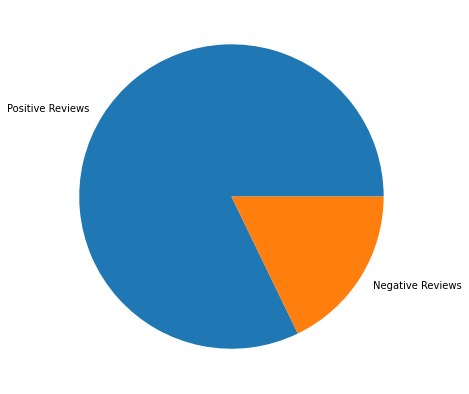

In [34]:
pos = 0
neg = 0
for score in d1['Sentiment']:
    if score > 0:
        pos += 1
    elif score < 0:
        neg += 1

#Visualiing the distribution of Sentiment
values = [pos, neg]
label = ['Positive Reviews', 'Negative Reviews']

fig = plt.figure(figsize =(10, 7)) 
plt.pie(values, labels = label)

plt.show()

In [35]:
#Number of Negative words in a review
reviews = d1['Review_text'].tolist()
negative_count = []
for rev in reviews:
    words = rev.split()
    neg = 0
    for w in words:
        testimonial = TextBlob(w)
        score = testimonial.sentiment.polarity
        if score < 0:
            neg += 1
    negative_count.append(neg)

In [36]:
d1['Neg_Count'] = negative_count

# **Unique words count**

In [37]:
#Word Count
d1['Word_Count'] = d1['Review_text'].str.split().str.len()

In [38]:
for i in range(d1.shape[0]):
    if d1.loc[i].Word_Count == 0:
        d1.drop(index=i, inplace=True)
d1.reset_index(drop=True, inplace=True)

In [39]:
reviews = d1['Review_text'].str.lower().str.split()

# Get amount of unique words
d1['Unique_words'] = reviews.apply(set).apply(len)

# **POS - Tagging**

In [40]:
import nltk
nltk.download('averaged_perceptron_tagger')
Review_text = d1.Review_text


array_Noun = []
array_Adj = []
array_Verb = []
array_Adv = []
array_Pro = []
array_Pre = []
array_Con = []
array_Art = []
array_Nega = []
array_Aux = []

articles = ['a', 'an', 'the']
negations = ['no', 'not', 'none', 'nobody', 'nothing', 'neither', 'nowhere', 'never', 'hardly', 'barely', 'scarcely']
auxilliary = ['am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'will', 'would', 'shall', 'should', 'may', 'might', 'must', 'can', 'could', 'do', 'does', 'did', 'have', 'having', 'has', 'had']

for j in Review_text:
    text = j ;
    filter=re.sub('[^\w\s]', '', text)
    conver_lower=filter.lower()
    Tinput = conver_lower.split(" ")
    
    for i in range(0, len(Tinput)):
        Tinput[i] = "".join(Tinput[i])
    UniqW = Counter(Tinput)
    s = " ".join(UniqW.keys())
    
    tokenized = sent_tokenize(s)
    
    for i in tokenized:
        wordsList = nltk.word_tokenize(i)
        #wordsList = [w for w in wordsList if not w in stop_words]
        
        Art = 0
        Nega = 0
        Aux = 0
        for word in wordsList:
            if word in articles:
                Art += 1
            elif word in negations:
                Nega += 1
            elif word in auxilliary:
                Aux += 1
                
        tagged = nltk.pos_tag(wordsList)
        counts = Counter(tag for word,tag in tagged)

        N = sum([counts[i] for i in counts.keys() if 'NN' in i])
        Adj = sum([counts[i] for i in counts.keys() if 'JJ' in i])
        Verb = sum([counts[i] for i in counts.keys() if 'VB' in i])
        Adv = sum([counts[i] for i in counts.keys() if 'RB' in i])
        Pro = sum([counts[i] for i in counts.keys() if (('PRP' in i) or ('PRP$' in i) or ('WP' in i) or ('WP$' in i))])
        Pre = sum([counts[i] for i in counts.keys() if 'IN' in i])
        Con = sum([counts[i] for i in counts.keys() if 'CC' in i])

        array_Noun.append(N)
        array_Adj.append(Adj)
        array_Verb.append(Verb)
        array_Adv.append(Adv)
        array_Pro.append(Pro)
        array_Pre.append(Pre)
        array_Con.append(Con)
        array_Art.append(Art)
        array_Nega.append(Nega)
        array_Aux.append(Aux)
print('Completed')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asif Iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Completed


In [41]:
POS = ['Noun_Count', 'Adj_Count', 'Verb_Count', 'Adv_Count', 'Pro_Count', 'Pre_Count', 'Con_Count', 'Art_Count', 'Nega_Count', 'Aux_Count']
Values = [array_Noun, array_Adj, array_Verb, array_Adv, array_Pro, array_Pre, array_Con, array_Art, array_Nega, array_Aux]
i = 0
for x in POS:
    d1[x] = pd.Series(Values[i])
    d1[x] = d1[x].fillna(0)
    d1[x] = d1[x].astype(float)
    i += 1

# **Authenticity**

In [42]:
d1 = d1.assign(Authenticity = lambda x: (x.Pro_Count + x.Unique_words - x.Neg_Count) / x.Word_Count)

In [43]:
d1 = d1.assign(AT = lambda x: 30 + (x.Art_Count + x.Pre_Count - x.Pro_Count - x.Aux_Count - x.Con_Count - x.Adv_Count - x.Nega_Count))

# **Labelling the Reviews**

In [44]:
def label(Auth, At, N, Adj, V, Av, S, Sub, W):
    score = 0
    if Auth >= 0.49:
        score += 2
    if At <= 20:
        score += 1
    if (N + Adj) >= (V + Av):
        score += 1
    if -0.5 <= S <= 0.5:
        score += 1
    if Sub <= 0.5:
        score += 2
    if W > 75:
        score += 3
    if score >= 5:
        return 0
    else:
        return 1

In [45]:
d1['Rev_Type'] = d1.apply(lambda x: label(x['Authenticity'], x['AT'], x['Noun_Count'], x['Adj_Count'], x['Verb_Count'], x['Adv_Count'], x['Sentiment'], x['Subjectivity'], x['Word_Count']), axis = 1)

In [46]:
d1['Rev_Type'].value_counts()

1    5190
0    4248
Name: Rev_Type, dtype: int64

In [47]:
d1['Rev_Type'].unique()

array([0, 1], dtype=int64)

In [48]:
d1.head()

,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,Neg_Count,...,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Rev_Type
0,2018-08-10,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,it s a logitech definitely worth buying it,Aqib Mehmood,5,a really awesome keyboard i was actually go...,77,0.359722,0.552778,1,...,6.0,4.0,3.0,2.0,2.0,1.0,9.0,0.706522,13.0,0
1,2018-03-27,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,great deal got it for with lightening ...,Chauhan,4,i know its costly but its worth your money ...,55,0.233125,0.468542,2,...,10.0,4.0,7.0,2.0,2.0,1.0,6.0,0.666667,16.0,0
2,2018-12-19,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,loved it,Smok3y,5,i had been contemplating to buy this for a l...,18,0.338750,0.568750,3,...,3.0,4.0,7.0,1.0,2.0,0.0,9.0,0.735294,22.0,0
3,2020-06-25,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,not a good purchase please read description,Kumar Saharsh,1,so very very small keys for fast typers w...,11,0.139083,0.507840,3,...,6.0,4.0,8.0,1.0,2.0,2.0,5.0,0.687500,22.0,0
4,2018-10-27,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,good only when new,Amazon Customer,2,good to use keyboard while it is new but it...,15,0.165427,0.698140,2,...,4.0,2.0,9.0,2.0,1.0,1.0,3.0,0.731343,28.0,1


# **Model Training**

In [49]:
df = d1.loc[:, d1.columns[4:-1]]
df.drop(['Review_text','Neg_Count','Unique_words','Pro_Count', 'Pre_Count', 'Con_Count', 'Art_Count',
       'Nega_Count', 'Aux_Count'], axis=1, inplace=True)

In [50]:
df

,Rating,Review_helpful,Sentiment,Subjectivity,Word_Count,Noun_Count,Adj_Count,Verb_Count,Adv_Count,Authenticity,AT
0,5,77,0.359722,0.552778,92,16.0,11.0,14.0,6.0,0.706522,13.0
1,4,55,0.233125,0.468542,156,30.0,15.0,24.0,10.0,0.666667,16.0
2,5,18,0.338750,0.568750,102,19.0,11.0,18.0,3.0,0.735294,22.0
3,1,11,0.139083,0.507840,112,18.0,10.0,17.0,6.0,0.687500,22.0
4,2,15,0.165427,0.698140,67,8.0,9.0,9.0,4.0,0.731343,28.0
...,...,...,...,...,...,...,...,...,...,...,...
9433,5,0,0.000000,0.000000,8,2.0,0.0,2.0,0.0,1.000000,29.0
9434,5,0,0.400000,0.700000,14,4.0,3.0,1.0,2.0,1.071429,24.0
9435,5,0,1.000000,1.000000,1,1.0,0.0,0.0,0.0,1.000000,30.0
9436,4,0,0.600000,0.800000,3,1.0,0.0,1.0,0.0,1.000000,30.0


In [51]:
min_max_scaler = preprocessing.MinMaxScaler()
Columns=df.columns
df[Columns] = min_max_scaler.fit_transform(df[Columns])

In [52]:
df

,Rating,Review_helpful,Sentiment,Subjectivity,Word_Count,Noun_Count,Adj_Count,Verb_Count,Adv_Count,Authenticity,AT
0,1.00,0.008579,0.679861,0.552778,0.059091,0.086486,0.120879,0.137255,0.125000,0.423913,0.622951
1,0.75,0.006128,0.616563,0.468542,0.100649,0.162162,0.164835,0.235294,0.208333,0.400000,0.672131
2,1.00,0.002006,0.669375,0.568750,0.065584,0.102703,0.120879,0.176471,0.062500,0.441176,0.770492
3,0.00,0.001226,0.569541,0.507840,0.072078,0.097297,0.109890,0.166667,0.125000,0.412500,0.770492
4,0.25,0.001671,0.582713,0.698140,0.042857,0.043243,0.098901,0.088235,0.083333,0.438806,0.868852
...,...,...,...,...,...,...,...,...,...,...,...
9433,1.00,0.000000,0.500000,0.000000,0.004545,0.010811,0.000000,0.019608,0.000000,0.600000,0.885246
9434,1.00,0.000000,0.700000,0.700000,0.008442,0.021622,0.032967,0.009804,0.041667,0.642857,0.803279
9435,1.00,0.000000,1.000000,1.000000,0.000000,0.005405,0.000000,0.000000,0.000000,0.600000,0.901639
9436,0.75,0.000000,0.800000,0.800000,0.001299,0.005405,0.000000,0.009804,0.000000,0.600000,0.901639


In [53]:
# Converting Dataset into 'x' all features of dataset
# 'y' all labels
# NOTE:- Labels will be converted into Categorical Labelled data i.e. (0 or 1)
# Training Dataset Size: 70% -------- Test Dataset Size: 30%
x,y = df, d1['Rev_Type']
RAN_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RAN_STATE)

**HyperParameter Tuning**

In [54]:
#Adaboost
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
gs1 = GridSearchCV(
                    estimator=ABC, 
                    param_grid=param_grid, 
                    scoring = 'roc_auc')
print ('Fitting grid search...')
gs1.fit(X_train,y_train)
print ("Grid search fitted.")

Fitting grid search...
Grid search fitted.


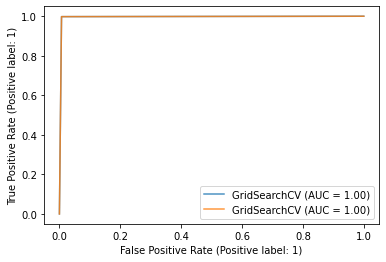

In [55]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(gs1, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [56]:
#RandomForest
param_grid = {
'bootstrap': [True],
'max_depth': [80, 90, 100, 110],
'max_features': [2,3],
'min_samples_leaf': [2,3,4],
'min_samples_split': [2, 5, 10],
'n_estimators': [100, 200, 300, 1000]
}

gs2 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=2),
    scoring='roc_auc',
    n_jobs = -1, 
    verbose = 2
)

print ('Fitting grid search...')
gs2.fit(X_train,y_train)
print ("Grid search fitted.")

Fitting grid search...
Fitting 2 folds for each of 288 candidates, totalling 576 fits
Grid search fitted.


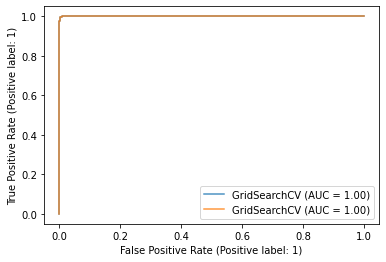

In [57]:
ax = plt.gca()
rfc_disp = plot_roc_curve(gs2, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [58]:
#Logistic Regression
gs3 = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'C': [10**i for i in range(-5,5)], 'class_weight': [None, 'balanced']},
    cv=StratifiedKFold(n_splits=5),
    scoring='roc_auc'
)

#fit the grid search object to our new dataset
print ('Fitting grid search...')
gs3.fit(X_train, y_train)
print ("Grid search fitted.")

Fitting grid search...
Grid search fitted.


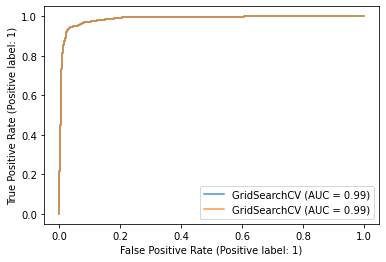

In [59]:
ax = plt.gca()
rfc_disp = plot_roc_curve(gs3, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [60]:
#SVM
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
gs4 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
print ('Fitting grid search...')
gs4.fit(X_train, y_train)
print ("Grid search fitted.")

Fitting grid search...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.944 total time=   1.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.937 total time=   0.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.928 total time=   0.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.939 total time=   0.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.914 total time=   1.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=   1.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.891 total time=   1.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.916 total time=   1.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.897 total time=   1.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.761 total time=   2.8s
[CV 2/5] END .....C=0.1,

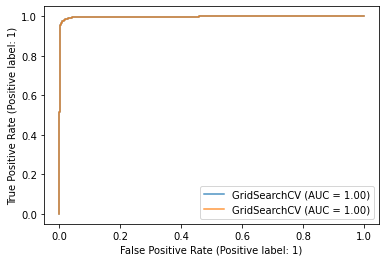

In [61]:
ax = plt.gca()
rfc_disp = plot_roc_curve(gs4, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [62]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
gs5 = GridSearchCV(knn_2, hyperparameters, cv=5,n_jobs = -1)
#Fit the model
best_model = gs5.fit(X_train,y_train)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 1
Best p: 1
Best n_neighbors: 15


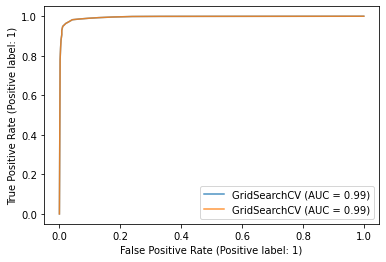

In [63]:
ax = plt.gca()
rfc_disp = plot_roc_curve(gs5, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [64]:
clf1 = gs1.best_estimator_
clf2 = gs2.best_estimator_
clf3 = gs3.best_estimator_
clf4 = gs4.best_estimator_
clf5 = gs5.best_estimator_

In [65]:
probas =clf3.predict(X_test)

# ROC/AUC score
print ('ROC_AUC Score:',accuracy_score(y_test, probas))

ROC_AUC Score: 0.946680790960452


In [66]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

In [67]:
def models_evaluation(X, y, folds):
    aB = cross_validate(clf1, X, y, cv=folds, scoring=scoring)
    rF = cross_validate(clf2, X, y, cv=folds, scoring=scoring)
    lR = cross_validate(clf3, X, y, cv=folds, scoring=scoring)
    SVC = cross_validate(clf4, X, y, cv=folds, scoring=scoring)
    knn_2 = cross_validate(clf5, X, y, cv=folds, scoring=scoring)
    

    # Create a data frame with the models performance metrics scores
    models_scores_table = pd.DataFrame({'AdaBoost':[aB['test_accuracy'].mean(),
                                                               aB['test_precision'].mean(),
                                                               aB['test_recall'].mean(),
                                                               aB['test_f1_score'].mean()],

                                      'Random Forest':[rF['test_accuracy'].mean(),
                                                                   rF['test_precision'].mean(),
                                                                   rF['test_recall'].mean(),
                                                                   rF['test_f1_score'].mean()],

                                      'Logistic Regression':[lR['test_accuracy'].mean(),
                                                       lR['test_precision'].mean(),
                                                       lR['test_recall'].mean(),
                                                       lR['test_f1_score'].mean()],
                                        
                                      'Support Vector Machine':[SVC['test_accuracy'].mean(),
                                                       SVC['test_precision'].mean(),
                                                       SVC['test_recall'].mean(),
                                                       SVC['test_f1_score'].mean()],
                                        

                                      'K-Nearest Neighbors':[knn_2['test_accuracy'].mean(),
                                                       knn_2['test_precision'].mean(),
                                                       knn_2['test_recall'].mean(),
                                                       knn_2['test_f1_score'].mean()]

                                                       
                                                       },


                                      

                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    return(models_scores_table)
models_evaluation(x, y, 5)

,AdaBoost,Random Forest,Logistic Regression,Support Vector Machine,K-Nearest Neighbors,Best Score
Accuracy,0.990570,0.993431,0.939287,0.979869,0.969803,Random Forest
Precision,0.993029,0.993878,0.940009,0.982708,0.974614,Random Forest
Recall,0.989788,0.994220,0.951060,0.980732,0.970520,Random Forest
F1 Score,0.991394,0.994033,0.944552,0.981666,0.972416,Random Forest


In [68]:
from sklearn.metrics import plot_confusion_matrix


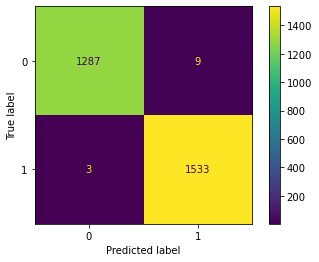

In [69]:
# Predicting Test Dataset i.e.(Adaboost)
predicted1 = clf1.predict(X_test)
plot_confusion_matrix(clf1, X_test, y_test)

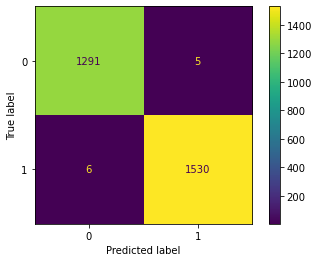

In [70]:
# Test Predictions for classifier 2 i.e. (Random Forest) 
predicted2 = clf2.predict(X_test)
plot_confusion_matrix(clf2, X_test, y_test)

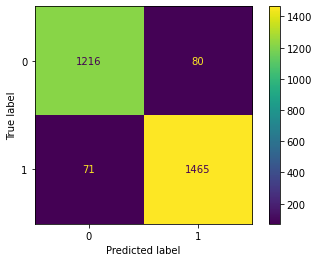

In [71]:
# Test Predictions for classifier 3 i.e. (Logistic Regression) 
predicted3 = clf3.predict(X_test)
plot_confusion_matrix(clf3, X_test, y_test)

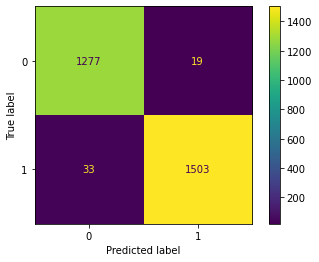

In [72]:
# Test Predictions for classifier 4 i.e. (SVM)
predicted4 = clf4.predict(X_test)
plot_confusion_matrix(clf4, X_test, y_test)

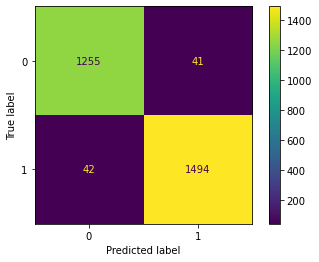

In [73]:
# Test Predictions for classifier 5 i.e. (KNN)
predicted5 = clf5.predict(X_test)
plot_confusion_matrix(clf5, X_test, y_test)

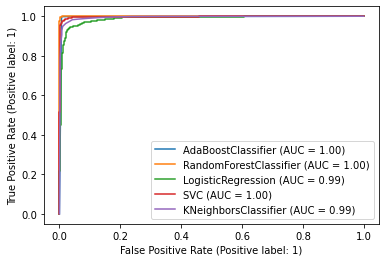

In [74]:
disp=plot_roc_curve(clf1, X_test,y_test)
plot_roc_curve(clf2, X_test,y_test,ax=disp.ax_)
plot_roc_curve(clf3, X_test,y_test,ax=disp.ax_)
plot_roc_curve(clf4, X_test,y_test,ax=disp.ax_)
plot_roc_curve(clf5, X_test,y_test,ax=disp.ax_)
